# Optimization Techniques on MNIST Dataset
This notebook explores various optimization techniques for training neural networks on the MNIST dataset. The focus will be on different optimization strategies including Adaptive Learning Rates, SGD, Mini-Batch Gradient Descent, and Learning Rate Adjustments. Each section will provide a practical task related to these techniques.

In [29]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Load Fashion MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

# Normalize data
x_train, x_test = x_train / 255.0, x_test / 255.0

# One-hot encode labels
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

x_train = x_train.reshape(x_train.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)

## Adaptive Learning Rates

## Implementing a Simple Neural Network from Scratch

### Building the Network
Define the architecture of a simple feedforward neural network with one hidden layer. You will need to manually initialize the weights and biases.

**TODO:** Initialize Parameters
Objective: Create a function to initialize weights and biases for all layers of the network.
Instructions:
- Initialize weights with small random values and biases with zeros.
- Use numpy for creating arrays and operations.

Hint: Use np.random.randn for weights and np.zeros for biases. Scale weights by 0.1.

In [19]:
def initialize_parameters(input_size, hidden_size, output_size):
    """
    Initialize weights and biases for a simple feedforward neural network.

    Parameters:
    - input_size: Number of input features.
    - hidden_size: Number of neurons in the hidden layer.
    - output_size: Number of output classes.

    Returns:
    - parameters: A dictionary containing weights and biases.
    """
    np.random.seed(42)  # For reproducibility

    # Initialize weights with small random values scaled by 0.1
    W1 = np.random.randn(input_size, hidden_size) * 0.1
    b1 = np.zeros((1, hidden_size))

    W2 = np.random.randn(hidden_size, output_size) * 0.1
    b2 = np.zeros((1, output_size))

    # Pack parameters into a dictionary
    parameters = {
        "W1": W1,
        "b1": b1,
        "W2": W2,
        "b2": b2
    }

    return parameters


TODO: Define Activation Functions
Objective: Implement commonly used activation functions.
Instructions:
 - Define the ReLU and Sigmoid activation functions.
 - Ensure each function works with numpy arrays and supports both forward and derivative (gradient) computations.


In [20]:
def relu(x):
    """
    ReLU activation function.

    Parameters:
    - x: Input numpy array.

    Returns:
    - Output after applying ReLU.
    """
    return np.maximum(0, x)

def relu_derivative(x):
    """
    Derivative of ReLU activation function.

    Parameters:
    - x: Input numpy array.

    Returns:
    - Derivative of ReLU.
    """
    return np.where(x > 0, 1, 0)

def sigmoid(x):
    """
    Sigmoid activation function.

    Parameters:
    - x: Input numpy array.

    Returns:
    - Output after applying sigmoid.
    """
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    """
    Derivative of sigmoid activation function.

    Parameters:
    - x: Input numpy array.

    Returns:
    - Derivative of sigmoid.
    """
    s = sigmoid(x)
    return s * (1 - s)


TODO: Perform forward propagation through the network.

    Parameters:
    - X: Input data (shape: number of examples x input size).
    - parameters: Dictionary containing weights and biases.

    Returns:
    - A2: Output of the network (after activation).
    - cache: Dictionary containing intermediate values for backpropagation.

In [21]:
def forward_propagation(X, parameters):
    """
    Perform forward propagation through the network.

    Parameters:
    - X: Input data (shape: number of examples x input size).
    - parameters: Dictionary containing weights and biases.

    Returns:
    - A2: Output of the network (after activation).
    - cache: Dictionary containing intermediate values for backpropagation.
    """
    # Retrieve parameters
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]

    # Forward propagation
    Z1 = np.dot(X, W1) + b1  # Linear step for layer 1
    A1 = relu(Z1)            # Activation step for layer 1
    Z2 = np.dot(A1, W2) + b2 # Linear step for layer 2
    A2 = sigmoid(Z2)         # Activation step for layer 2 (output layer)

    # Cache intermediate values for backpropagation
    cache = {
        "Z1": Z1,
        "A1": A1,
        "Z2": Z2,
        "A2": A2
    }

    return A2, cache


TODO: Implement the loss function. Compute the categorical cross-entropy loss.

    Parameters:
    - y_true: True labels (one-hot encoded).
    - y_pred: Predicted probabilities (output of the network).

    Returns:
    - loss: Computed loss.

In [22]:
def compute_loss(y_true, y_pred):
    """
    Compute the categorical cross-entropy loss.

    Parameters:
    - y_true: True labels (one-hot encoded).
    - y_pred: Predicted probabilities (output of the network).

    Returns:
    - loss: Computed loss.
    """
    # Number of examples
    m = y_true.shape[0]

    # Clip predicted probabilities to avoid log(0)
    y_pred_clipped = np.clip(y_pred, 1e-12, 1 - 1e-12)

    # Compute categorical cross-entropy loss
    loss = -np.sum(y_true * np.log(y_pred_clipped)) / m

    return loss


TODO: Implement backpropagation for the network and Perform backward propagation through the network.

    Parameters:
    - X: Input data.
    - y_true: True labels.
    - parameters: Dictionary containing weights and biases.
    - cache: Intermediate values from forward propagation.

    Returns:
    - gradients: Dictionary containing gradients for weights and biases.

In [23]:
def backward_propagation(X, y_true, parameters, cache):
    """
    Perform backward propagation through the network.

    Parameters:
    - X: Input data.
    - y_true: True labels.
    - parameters: Dictionary containing weights and biases.
    - cache: Intermediate values from forward propagation.

    Returns:
    - gradients: Dictionary containing gradients for weights and biases.
    """
    # Retrieve intermediate values from cache
    A1 = cache["A1"]
    A2 = cache["A2"]
    Z1 = cache["Z1"]

    # Retrieve parameters
    W2 = parameters["W2"]

    # Number of examples
    m = X.shape[0]

    # Compute gradients
    dZ2 = A2 - y_true  # Gradient of loss with respect to Z2
    dW2 = np.dot(A1.T, dZ2) / m  # Gradient of W2
    db2 = np.sum(dZ2, axis=0, keepdims=True) / m  # Gradient of b2

    dA1 = np.dot(dZ2, W2.T)  # Gradient of A1
    dZ1 = dA1 * relu_derivative(Z1)  # Gradient of Z1
    dW1 = np.dot(X.T, dZ1) / m  # Gradient of W1
    db1 = np.sum(dZ1, axis=0, keepdims=True) / m  # Gradient of b1

    # Store gradients in a dictionary
    gradients = {
        "dW1": dW1,
        "db1": db1,
        "dW2": dW2,
        "db2": db2
    }

    return gradients


TODO: Update the parameters using gradient descent.

    Parameters:
    - parameters: Current weights and biases.
    - gradients: Calculated gradients.
    - learning_rate: Learning rate for updates.

    Returns:
    - parameters: Updated weights and biases.

In [24]:
def update_parameters(parameters, gradients, learning_rate=0.01):
    """
    Update parameters using gradient descent.

    Parameters:
    - parameters: Current weights and biases.
    - gradients: Calculated gradients.
    - learning_rate: Learning rate for updates.

    Returns:
    - parameters: Updated weights and biases.
    """
    # Update weights and biases for layer 1
    parameters["W1"] -= learning_rate * gradients["dW1"]
    parameters["b1"] -= learning_rate * gradients["db1"]

    # Update weights and biases for layer 2
    parameters["W2"] -= learning_rate * gradients["dW2"]
    parameters["b2"] -= learning_rate * gradients["db2"]

    return parameters



TODO: Train the model by changing the hidden layer size (such as [32, 64, 128]) and observe the impact on network performance during training.

    Train the neural network model.

    Parameters:
    - X_train: Training data.
    - y_train: One-hot encoded labels.
    - hidden_size: Number of neurons in the hidden layer.
    - epochs: Number of training epochs.
    - learning_rate: Learning rate for optimization.

In [25]:
def train_model(X_train, y_train, hidden_size, epochs=50, learning_rate=0.01):
    """
    Train the neural network model.

    Parameters:
    - X_train: Training data.
    - y_train: One-hot encoded labels.
    - hidden_size: Number of neurons in the hidden layer.
    - epochs: Number of training epochs.
    - learning_rate: Learning rate for optimization.
    """
    input_size = X_train.shape[1]
    output_size = y_train.shape[1]

    # Initialize parameters
    parameters = initialize_parameters(input_size, hidden_size, output_size)

    # Track loss over epochs
    loss_history = []

    for epoch in range(epochs):
        # Forward propagation
        A2, cache = forward_propagation(X_train, parameters)

        # Compute loss
        loss = compute_loss(y_train, A2)
        loss_history.append(loss)

        # Backward propagation
        gradients = backward_propagation(X_train, y_train, parameters, cache)

        # Update parameters
        parameters = update_parameters(parameters, gradients, learning_rate)

        # Print loss every 10 epochs
        if (epoch + 1) % 10 == 0:
            print(f"Epoch {epoch + 1}/{epochs}, Loss: {loss:.4f}")

    # Plot the loss over epochs
    plt.plot(range(epochs), loss_history)
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.title(f"Training Loss (Hidden Layer Size: {hidden_size})")
    plt.show()

    return parameters


Epoch 10/50, Loss: 1.5766
Epoch 20/50, Loss: 1.9292
Epoch 30/50, Loss: 1.9932
Epoch 40/50, Loss: 1.9589
Epoch 50/50, Loss: 1.8967


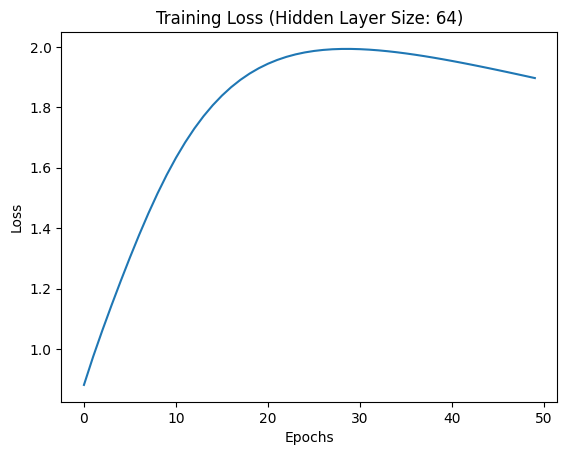

In [33]:
trained_parameters = train_model(x_train, y_train, hidden_size=64, epochs=50, learning_rate=0.01)

TODO: Implement Adam Optimizer

1. Initialize Parameters: Create variables to store the moment estimates (first and second) for each parameter.

    Parameters:
    - parameters: Dictionary containing weights and biases.

    Returns:
    - v: First moment vector (initialized to zeros).
    - s: Second moment vector (initialized to zeros).
    - t: Time step (initialized to 0).

2. Update Rules: Implement the update rules based on the gradients, learning rate, and moment estimates.


In [31]:
def initialize_adam(parameters):
    """
    Initialize the Adam optimizer variables.

    Parameters:
    - parameters: Dictionary containing weights and biases.

    Returns:
    - v: First moment vector (initialized to zeros).
    - s: Second moment vector (initialized to zeros).
    - t: Time step (initialized to 0).
    """
    v = {}
    s = {}

    for key in parameters:
        v[key] = np.zeros_like(parameters[key])  # Initialize first moment estimates
        s[key] = np.zeros_like(parameters[key])  # Initialize second moment estimates

    t = 0  # Initialize time step

    return v, s, t


def update_parameters_with_adam(parameters, gradients, v, s, t, learning_rate=0.001, beta1=0.9, beta2=0.999, epsilon=1e-8):
    """
    Update parameters using the Adam optimizer.

    Parameters:
    - parameters: Current weights and biases.
    - gradients: Calculated gradients.
    - v: First moment vector.
    - s: Second moment vector.
    - t: Time step.
    - learning_rate: Learning rate for updates.
    - beta1: Exponential decay rate for the first moment estimates.
    - beta2: Exponential decay rate for the second moment estimates.
    - epsilon: Small constant for numerical stability.

    Returns:
    - parameters: Updated weights and biases.
    - v: Updated first moment vector.
    - s: Updated second moment vector.
    - t: Updated time step.
    """
    t += 1  # Increment time step

    for key in parameters:
        # Compute biased first moment estimate
        v[key] = beta1 * v[key] + (1 - beta1) * gradients["d" + key]
        # Compute biased second moment estimate
        s[key] = beta2 * s[key] + (1 - beta2) * (gradients["d" + key] ** 2)

        # Correct bias in first moment
        v_corrected = v[key] / (1 - beta1 ** t)
        # Correct bias in second moment
        s_corrected = s[key] / (1 - beta2 ** t)

        # Update parameters
        parameters[key] -= learning_rate * v_corrected / (np.sqrt(s_corrected) + epsilon)

    return parameters, v, s, t


TODO: Implement Adam optimizer into the training loop.

In [32]:
def train_model_with_adam(X_train, y_train, hidden_size, epochs=50, learning_rate=0.001):
    """
    Train the neural network model using Adam optimizer.

    Parameters:
    - X_train: Training data.
    - y_train: One-hot encoded labels.
    - hidden_size: Number of neurons in the hidden layer.
    - epochs: Number of training epochs.
    - learning_rate: Learning rate for optimization.
    """
    input_size = X_train.shape[1]
    output_size = y_train.shape[1]

    # Initialize parameters
    parameters = initialize_parameters(input_size, hidden_size, output_size)

    # Initialize Adam optimizer variables
    v, s, t = initialize_adam(parameters)

    # Track loss over epochs
    loss_history = []

    for epoch in range(epochs):
        # Forward propagation
        A2, cache = forward_propagation(X_train, parameters)

        # Compute loss
        loss = compute_loss(y_train, A2)
        loss_history.append(loss)

        # Backward propagation
        gradients = backward_propagation(X_train, y_train, parameters, cache)

        # Update parameters using Adam
        parameters, v, s, t = update_parameters_with_adam(
            parameters, gradients, v, s, t, learning_rate=learning_rate
        )

        # Print loss every 10 epochs
        if (epoch + 1) % 10 == 0:
            print(f"Epoch {epoch + 1}/{epochs}, Loss: {loss:.4f}")

    # Plot the loss over epochs
    plt.plot(range(epochs), loss_history)
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.title(f"Training Loss with Adam (Hidden Layer Size: {hidden_size})")
    plt.show()

    return parameters

Epoch 10/50, Loss: 0.9973
Epoch 20/50, Loss: 0.7447
Epoch 30/50, Loss: 0.7116
Epoch 40/50, Loss: 0.6385
Epoch 50/50, Loss: 0.5844


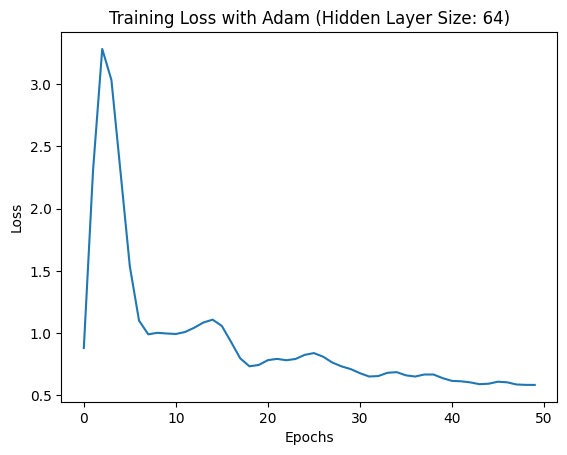

In [38]:
trained_parameters = train_model_with_adam(x_train, y_train, hidden_size=64, epochs=50, learning_rate=0.01)

### Compare Adam and RMSprop


TODO: First, implement the RMSprop optimizer. The RMSprop optimizer uses a moving average of squared gradients to normalize the gradient, which helps to stabilize the updates.

In [41]:
def initialize_rmsprop(parameters):
    """
    Initialize the RMSprop variables.

    Parameters:
    - parameters: Dictionary containing weights and biases.

    Returns:
    - s: Second moment vector (initialized to zeros).
    """
    s = {}

    for key in parameters:
        s[key] = np.zeros_like(parameters[key])  # Initialize second moment estimates to zeros

    return s


def update_parameters_with_rmsprop(parameters, gradients, s, learning_rate=0.001, beta=0.9, epsilon=1e-8):
    """
    Update parameters using the RMSprop optimizer.

    Parameters:
    - parameters: Current weights and biases.
    - gradients: Calculated gradients.
    - s: Second moment vector.
    - learning_rate: Learning rate for updates.
    - beta: Exponential decay rate for the second moment estimates.
    - epsilon: Small constant for numerical stability.

    Returns:
    - parameters: Updated weights and biases.
    - s: Updated second moment vector.
    """
    for key in parameters:
        # Update second moment estimate
        s[key] = beta * s[key] + (1 - beta) * (gradients["d" + key] ** 2)

        # Update parameters
        parameters[key] -= learning_rate * gradients["d" + key] / (np.sqrt(s[key]) + epsilon)

    return parameters, s


TODO: Modify the training loop to allow for both optimizers and store the loss history for comparison.

In [42]:
def train_model(X_train, y_train, hidden_size, epochs=50, learning_rate=0.001, optimizer='adam'):
    """
    Train the neural network model using the specified optimizer.

    Parameters:
    - X_train: Training data.
    - y_train: One-hot encoded labels.
    - hidden_size: Number of neurons in the hidden layer.
    - epochs: Number of training epochs.
    - learning_rate: Learning rate for optimization.
    - optimizer: The optimizer to use ('adam' or 'rmsprop').

    Returns:
    - loss_history: List of loss values over epochs.
    """
    input_size = X_train.shape[1]
    output_size = y_train.shape[1]

    # Initialize parameters
    parameters = initialize_parameters(input_size, hidden_size, output_size)

    # Initialize optimizer-specific variables
    if optimizer == 'adam':
        v, s, t = initialize_adam(parameters)
    elif optimizer == 'rmsprop':
        s = initialize_rmsprop(parameters)

    # Track loss over epochs
    loss_history = []

    for epoch in range(epochs):
        # Forward propagation
        A2, cache = forward_propagation(X_train, parameters)

        # Compute loss
        loss = compute_loss(y_train, A2)
        loss_history.append(loss)

        # Backward propagation
        gradients = backward_propagation(X_train, y_train, parameters, cache)

        # Update parameters based on the chosen optimizer
        if optimizer == 'adam':
            parameters, v, s, t = update_parameters_with_adam(
                parameters, gradients, v, s, t, learning_rate=learning_rate
            )
        elif optimizer == 'rmsprop':
            parameters, s = update_parameters_with_rmsprop(
                parameters, gradients, s, learning_rate=learning_rate
            )
        else:
            raise ValueError("Unsupported optimizer. Choose 'adam' or 'rmsprop'.")

        # Print loss every 10 epochs
        if (epoch + 1) % 10 == 0:
            print(f"Epoch {epoch + 1}/{epochs}, Loss: {loss:.4f}")

    # Plot the loss over epochs
    # plt.plot(range(epochs), loss_history)
    # plt.xlabel("Epochs")
    # plt.ylabel("Loss")
    # plt.title(f"Training Loss ({optimizer.capitalize()} Optimizer, Hidden Layer Size: {hidden_size})")
    # plt.show()

    return loss_history


TODO:  Compare Both Optimizers. Create a function to train the model using both optimizers and plot the loss histories for comparison.

In [43]:
def compare_optimizers(X_train, y_train, hidden_size, epochs=50):
    """
    Compare the Adam and RMSprop optimizers.

    Parameters:
    - X_train: Training data.
    - y_train: One-hot encoded labels.
    - hidden_size: Number of neurons in the hidden layer.
    - epochs: Number of training epochs.
    """
    # Train model with Adam optimizer
    print("Training with Adam Optimizer...")
    loss_history_adam = train_model(X_train, y_train, hidden_size, epochs=epochs, learning_rate=0.001, optimizer='adam')

    # Train model with RMSprop optimizer
    print("Training with RMSprop Optimizer...")
    loss_history_rmsprop = train_model(X_train, y_train, hidden_size, epochs=epochs, learning_rate=0.001, optimizer='rmsprop')

    # Plot comparison of loss histories
    plt.plot(range(epochs), loss_history_adam, label="Adam")
    plt.plot(range(epochs), loss_history_rmsprop, label="RMSprop")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.title(f"Optimizer Comparison (Hidden Layer Size: {hidden_size})")
    plt.legend()
    plt.show()

    # Print final losses
    print(f"Final Loss with Adam: {loss_history_adam[-1]:.4f}")
    print(f"Final Loss with RMSprop: {loss_history_rmsprop[-1]:.4f}")


Training with Adam Optimizer...
Epoch 10/50, Loss: 1.8041
Epoch 20/50, Loss: 2.0899
Epoch 30/50, Loss: 1.4231
Epoch 40/50, Loss: 1.0877
Epoch 50/50, Loss: 1.0132
Training with RMSprop Optimizer...
Epoch 10/50, Loss: 1.5646
Epoch 20/50, Loss: 1.1947
Epoch 30/50, Loss: 1.0011
Epoch 40/50, Loss: 0.8430
Epoch 50/50, Loss: 0.7842


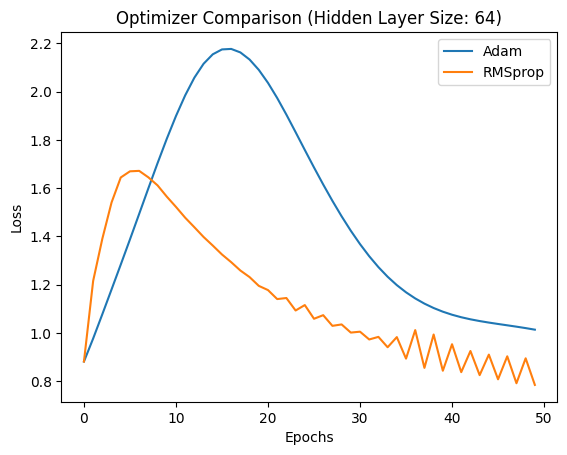

Final Loss with Adam: 1.0132
Final Loss with RMSprop: 0.7842


In [44]:
compare_optimizers(x_train, y_train, hidden_size=64, epochs=50)

## Stochastic Gradient Descent (SGD)

### Impact of Different Learning Rates on SGD


Explore the impact of different learning rates on the training dynamics and performance of Stochastic Gradient Descent (SGD). This will allow us to observe how the learning rate affects convergence speed, stability, and final performance.

Steps for Implementing the Experiment

1. Define the SGD Optimizer: Implement a simple SGD optimizer.
2. Modify the Training Loop: Allow for different learning rates.
3. Train the Model: Run the training process with a set of predefined learning rates.
4. Visualize the Results: Plot the loss curves for each learning rate to compare their effects

1. Implement SGD Optimizer


In [45]:
def update_parameters_with_sgd(parameters, gradients, learning_rate=0.01):
    """
    Update parameters using Stochastic Gradient Descent (SGD).

    Parameters:
    - parameters: Current weights and biases.
    - gradients: Calculated gradients.
    - learning_rate: Learning rate for updates.

    Returns:
    - parameters: Updated weights and biases.
    """
    for key in parameters:
        parameters[key] -= learning_rate * gradients["d" + key]  # Gradient descent update
    return parameters


2. Modify the Training Loop


In [47]:
def train_model_with_sgd(X_train, y_train, hidden_size, epochs=50, learning_rates=[0.01, 0.1, 0.001]):
    """
    Train the model with SGD for different learning rates and visualize results.

    Parameters:
    - X_train: Training data.
    - y_train: One-hot encoded labels.
    - hidden_size: Number of neurons in the hidden layer.
    - epochs: Number of training epochs.
    - learning_rates: List of learning rates to experiment with.
    """
    input_size = X_train.shape[1]
    output_size = y_train.shape[1]
    results = {}

    for lr in learning_rates:
        # Initialize parameters
        parameters = initialize_parameters(input_size, hidden_size, output_size)
        loss_history = []

        for epoch in range(epochs):
            # Forward propagation
            A2, cache = forward_propagation(X_train, parameters)

            # Compute loss
            loss = compute_loss(y_train, A2)
            loss_history.append(loss)

            # Backward propagation
            gradients = backward_propagation(X_train, y_train, parameters, cache)

            # Update parameters using SGD
            parameters = update_parameters_with_sgd(parameters, gradients, learning_rate=lr)

        # Store results for visualization
        results[lr] = loss_history

    # Plot the loss for each learning rate
    # for lr, loss_history in results.items():
    #     plt.plot(range(epochs), loss_history, label=f"LR: {lr}")

    # plt.xlabel("Epochs")
    # plt.ylabel("Loss")
    # plt.title("SGD: Impact of Learning Rates on Training")
    # plt.legend()
    # plt.show()


3. Experiment with Different Learning Rates


In [49]:
def compare_learning_rates(X_train, y_train, hidden_size, epochs=50, learning_rates=[0.001, 0.01, 0.1]):
    """
    Compare the performance of SGD with different learning rates.

    Parameters:
    - X_train: Training data.
    - y_train: One-hot encoded labels.
    - hidden_size: Number of neurons in the hidden layer.
    - epochs: Number of training epochs.
    - learning_rates: List of learning rates to test.
    """
    input_size = X_train.shape[1]
    output_size = y_train.shape[1]
    results = {}

    for lr in learning_rates:
        print(f"Training with Learning Rate: {lr}")

        # Initialize parameters
        parameters = initialize_parameters(input_size, hidden_size, output_size)
        loss_history = []

        for epoch in range(epochs):
            # Forward propagation
            A2, cache = forward_propagation(X_train, parameters)

            # Compute loss
            loss = compute_loss(y_train, A2)
            loss_history.append(loss)

            # Backward propagation
            gradients = backward_propagation(X_train, y_train, parameters, cache)

            # Update parameters using SGD
            parameters = update_parameters_with_sgd(parameters, gradients, learning_rate=lr)

        # Store loss history for the current learning rate
        results[lr] = loss_history

    # Visualize the results
    plt.figure(figsize=(8, 6))
    for lr, loss_history in results.items():
        plt.plot(range(epochs), loss_history, label=f"Learning Rate: {lr}")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.title("SGD: Impact of Learning Rates on Loss")
    plt.legend()
    plt.show()


Training with Learning Rate: 0.001
Training with Learning Rate: 0.01
Training with Learning Rate: 0.1


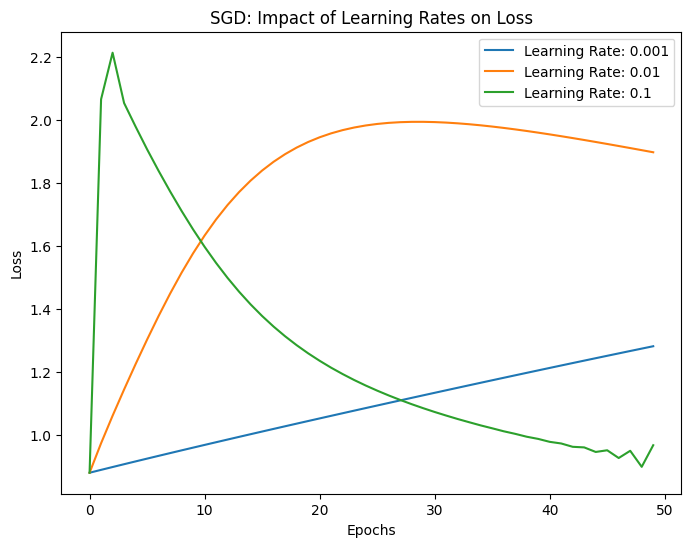

In [50]:
compare_learning_rates(X_train=x_train, y_train=y_train, hidden_size=64, epochs=50, learning_rates=[0.001, 0.01, 0.1])

### SGD with Momentum vs. Classic SGD


TODO: Compare Stochastic Gradient Descent (SGD) with momentum and classic SGD, you can set up an experiment that trains the same model using both methods. This will help you observe differences in convergence speed and stability.

Steps for Implementing the Comparison:

1. Implement Classic SGD: Ensure you have a basic SGD implementation.(already implemented in the previous cells)

2. Implement SGD with Momentum: Add a momentum version of the SGD optimizer.

3. Modify the Training Loop: Allow for both optimizers in the training process.

4. Train the Model: Run the training process using both optimizers.

5. Visualize the Results: Plot the loss curves for each optimizer to compare their performance.

2. Implement SGD with Momentum


In [51]:
def initialize_momentum(parameters):
    """
    Initialize the momentum variables.

    Parameters:
    - parameters: Dictionary containing weights and biases.

    Returns:
    - v: Momentum variable (initialized to zeros).
    """
    v = {}
    for key in parameters:
        v[key] = np.zeros_like(parameters[key])  # Initialize momentum to zero
    return v


def update_parameters_with_momentum(parameters, gradients, v, learning_rate=0.01, beta=0.9):
    """
    Update parameters using SGD with momentum.

    Parameters:
    - parameters: Current weights and biases.
    - gradients: Calculated gradients.
    - v: Momentum variable.
    - learning_rate: Learning rate for updates.
    - beta: Exponential decay rate for momentum.

    Returns:
    - parameters: Updated weights and biases.
    - v: Updated momentum variable.
    """
    for key in parameters:
        # Update momentum: v = beta * v - learning_rate * gradient
        v[key] = beta * v[key] + (1 - beta) * gradients["d" + key]

        # Update parameters using momentum
        parameters[key] -= learning_rate * v[key]

    return parameters, v


3. Modify the Training Loop


In [52]:
def train_model(X_train, y_train, hidden_size, epochs=50, learning_rate=0.01, optimizer='sgd'):
    """
    Train the neural network model using the specified optimizer.

    Parameters:
    - X_train: Training data.
    - y_train: One-hot encoded labels.
    - hidden_size: Number of neurons in the hidden layer.
    - epochs: Number of training epochs.
    - learning_rate: Learning rate for optimization.
    - optimizer: The optimizer to use ('sgd' or 'momentum').

    Returns:
    - loss_history: List of loss values over epochs.
    """
    input_size = X_train.shape[1]
    output_size = y_train.shape[1]

    # Initialize parameters
    parameters = initialize_parameters(input_size, hidden_size, output_size)

    # Initialize optimizer-specific variables
    if optimizer == 'momentum':
        v = initialize_momentum(parameters)

    # Track loss over epochs
    loss_history = []

    for epoch in range(epochs):
        # Forward propagation
        A2, cache = forward_propagation(X_train, parameters)

        # Compute loss
        loss = compute_loss(y_train, A2)
        loss_history.append(loss)

        # Backward propagation
        gradients = backward_propagation(X_train, y_train, parameters, cache)

        # Update parameters based on optimizer
        if optimizer == 'sgd':
            parameters = update_parameters_with_sgd(parameters, gradients, learning_rate)
        elif optimizer == 'momentum':
            parameters, v = update_parameters_with_momentum(parameters, gradients, v, learning_rate)
        else:
            raise ValueError("Unsupported optimizer. Choose 'sgd' or 'momentum'.")

        # Print progress every 10 epochs
        if (epoch + 1) % 10 == 0:
            print(f"Epoch {epoch + 1}/{epochs}, Loss: {loss:.4f}")

    return loss_history


4. Train the Model with Both Optimizers


In [53]:
def compare_sgd_and_momentum(X_train, y_train, hidden_size, epochs=50):
    """
    Compare the performance of classic SGD and SGD with momentum.

    Parameters:
    - X_train: Training data.
    - y_train: One-hot encoded labels.
    - hidden_size: Number of neurons in the hidden layer.
    - epochs: Number of training epochs.
    """
    # Train the model using Classic SGD
    print("Training with Classic SGD...")
    loss_history_sgd = train_model(
        X_train=X_train,
        y_train=y_train,
        hidden_size=hidden_size,
        epochs=epochs,
        learning_rate=0.01,
        optimizer='sgd'
    )

    # Train the model using SGD with Momentum
    print("Training with SGD with Momentum...")
    loss_history_momentum = train_model(
        X_train=X_train,
        y_train=y_train,
        hidden_size=hidden_size,
        epochs=epochs,
        learning_rate=0.01,
        optimizer='momentum'
    )

    # Plot the loss curves for both optimizers
    plt.figure(figsize=(8, 6))
    plt.plot(range(epochs), loss_history_sgd, label="Classic SGD", linestyle='--')
    plt.plot(range(epochs), loss_history_momentum, label="SGD with Momentum", linestyle='-')
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.title("Comparison of Classic SGD vs SGD with Momentum")
    plt.legend()
    plt.show()

    # Print final losses
    print(f"Final Loss with Classic SGD: {loss_history_sgd[-1]:.4f}")
    print(f"Final Loss with SGD with Momentum: {loss_history_momentum[-1]:.4f}")


Training with Classic SGD...
Epoch 10/50, Loss: 1.5766
Epoch 20/50, Loss: 1.9292
Epoch 30/50, Loss: 1.9932
Epoch 40/50, Loss: 1.9589
Epoch 50/50, Loss: 1.8967
Training with SGD with Momentum...
Epoch 10/50, Loss: 1.2042
Epoch 20/50, Loss: 1.9097
Epoch 30/50, Loss: 2.3879
Epoch 40/50, Loss: 2.3616
Epoch 50/50, Loss: 2.1130


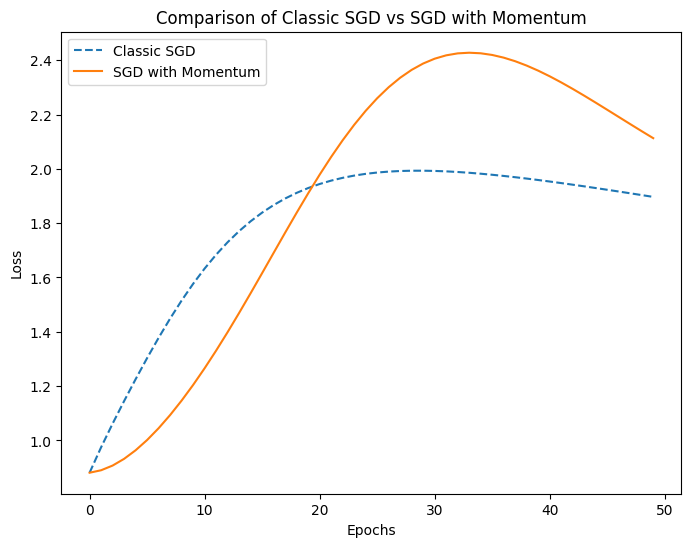

Final Loss with Classic SGD: 1.8967
Final Loss with SGD with Momentum: 2.1130


In [54]:
compare_sgd_and_momentum(X_train=x_train, y_train=y_train, hidden_size=64, epochs=50)

## Mini-Batch Gradient Descent

### Mini-Batch Size Optimization

TODO: Investigate how different mini-batch sizes affect model performance, you can set up an experiment where you train the same model using various mini-batch sizes.

Steps for Implementing the Mini-Batch Size Experiment

1. Modify the Training Loop: Update the training loop to use mini-batches.
2. Train the Model: Run the training process with a set of predefined mini-batch sizes.
3. Evaluate Performance: Track training time and accuracy for each mini-batch size.
4. Print the training losses and accuracies for comparison.

1. Modify the Training Loop for Mini-Batches


In [60]:
import time

def train_model_with_mini_batches(X_train, y_train, hidden_size, epochs=50, learning_rate=0.01, batch_size=32):
    """
    Train the neural network model using mini-batches.

    Parameters:
    - X_train: Training data.
    - y_train: One-hot encoded labels.
    - hidden_size: Number of neurons in the hidden layer.
    - epochs: Number of training epochs.
    - learning_rate: Learning rate for optimization.
    - batch_size: Size of mini-batches.

    Returns:
    - loss_history: List of loss values over epochs.
    - accuracy_history: List of accuracy values over epochs.
    """
    input_size = X_train.shape[1]
    output_size = y_train.shape[1]

    # Initialize parameters
    parameters = initialize_parameters(input_size, hidden_size, output_size)

    # Track losses and accuracies
    loss_history = []
    accuracy_history = []

    num_batches = X_train.shape[0] // batch_size

    for epoch in range(epochs):
        epoch_loss = 0
        correct_predictions = 0

        # Shuffle data
        perm = np.random.permutation(X_train.shape[0])
        X_train_shuffled = X_train[perm]
        y_train_shuffled = y_train[perm]

        for i in range(num_batches):
            # Get mini-batch
            start = i * batch_size
            end = start + batch_size
            X_batch = X_train_shuffled[start:end]
            y_batch = y_train_shuffled[start:end]

            # Forward propagation
            A2, cache = forward_propagation(X_batch, parameters)

            # Compute loss
            loss = compute_loss(y_batch, A2)
            epoch_loss += loss

            # Calculate accuracy
            predictions = np.argmax(A2, axis=1)
            true_labels = np.argmax(y_batch, axis=1)
            correct_predictions += np.sum(predictions == true_labels)

            # Backward propagation
            gradients = backward_propagation(X_batch, y_batch, parameters, cache)

            # Update parameters
            parameters = update_parameters_with_sgd(parameters, gradients, learning_rate)

        # Average loss and accuracy for the epoch
        avg_loss = epoch_loss / num_batches
        accuracy = correct_predictions / X_train.shape[0]

        loss_history.append(avg_loss)
        accuracy_history.append(accuracy)

        # Print epoch metrics
        if (epoch + 1) % 10 == 0:
          print(f"Epoch {epoch + 1}/{epochs}, Loss: {avg_loss:.4f}, Accuracy: {accuracy:.4f}")

    return loss_history, accuracy_history


2. Train the Model with Different Mini-Batch Sizes


In [61]:
import time

def compare_mini_batch_sizes(X_train, y_train, hidden_size, epochs=50, batch_sizes=[16, 32, 64]):
    """
    Compare the performance of different mini-batch sizes and print results.

    Parameters:
    - X_train: Training data.
    - y_train: One-hot encoded labels.
    - hidden_size: Number of neurons in the hidden layer.
    - epochs: Number of training epochs.
    - batch_sizes: List of mini-batch sizes to test.
    """
    results = {}

    for batch_size in batch_sizes:
        print(f"\nTraining with Mini-Batch Size: {batch_size}")
        start_time = time.time()

        # Train the model with the current batch size
        loss_history, accuracy_history = train_model_with_mini_batches(
            X_train, y_train, hidden_size, epochs=epochs, learning_rate=0.01, batch_size=batch_size
        )

        end_time = time.time()
        training_time = end_time - start_time

        # Store results for comparison
        results[batch_size] = {
            "loss_history": loss_history,
            "accuracy_history": accuracy_history,
            "training_time": training_time
        }

    # Plot loss curves for all batch sizes
    plt.figure(figsize=(10, 6))
    for batch_size, metrics in results.items():
        plt.plot(metrics["loss_history"], label=f"Batch Size: {batch_size}")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.title("Loss vs Epochs for Different Mini-Batch Sizes")
    plt.legend()
    plt.show()

    # Print final results for each batch size
    for batch_size, metrics in results.items():
        final_loss = metrics["loss_history"][-1]
        final_accuracy = metrics["accuracy_history"][-1]
        print(f"Batch Size: {batch_size}")
        print(f"  Final Loss: {final_loss:.4f}")
        print(f"  Final Accuracy: {final_accuracy:.4f}")
        print(f"  Training Time: {metrics['training_time']:.2f} seconds")



Training with Mini-Batch Size: 16
Epoch 10/50, Loss: 0.3710, Accuracy: 0.8741
Epoch 20/50, Loss: 0.3205, Accuracy: 0.8909
Epoch 30/50, Loss: 0.2915, Accuracy: 0.9016
Epoch 40/50, Loss: 0.2703, Accuracy: 0.9089
Epoch 50/50, Loss: 0.2521, Accuracy: 0.9158

Training with Mini-Batch Size: 32
Epoch 10/50, Loss: 0.4187, Accuracy: 0.8622
Epoch 20/50, Loss: 0.3650, Accuracy: 0.8785
Epoch 30/50, Loss: 0.3345, Accuracy: 0.8880
Epoch 40/50, Loss: 0.3129, Accuracy: 0.8952
Epoch 50/50, Loss: 0.2947, Accuracy: 0.9019

Training with Mini-Batch Size: 64
Epoch 10/50, Loss: 0.4711, Accuracy: 0.8462
Epoch 20/50, Loss: 0.4134, Accuracy: 0.8646
Epoch 30/50, Loss: 0.3819, Accuracy: 0.8737
Epoch 40/50, Loss: 0.3603, Accuracy: 0.8803
Epoch 50/50, Loss: 0.3436, Accuracy: 0.8861


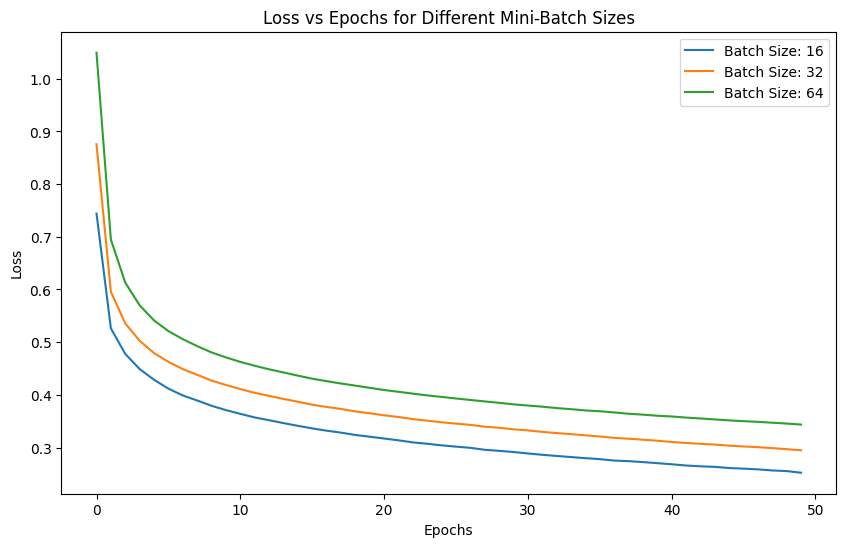

Batch Size: 16
  Final Loss: 0.2521
  Final Accuracy: 0.9158
  Training Time: 140.73 seconds
Batch Size: 32
  Final Loss: 0.2947
  Final Accuracy: 0.9019
  Training Time: 94.01 seconds
Batch Size: 64
  Final Loss: 0.3436
  Final Accuracy: 0.8861
  Training Time: 66.64 seconds


In [62]:
compare_mini_batch_sizes(X_train=x_train, y_train=y_train, hidden_size=64, epochs=50, batch_sizes=[16, 32, 64])

### Mini-Batch vs. Full-Batch Gradient Descent


TODO: Compare the efficiency and performance of mini-batch gradient descent against full-batch gradient descent.

1. Implement Full-Batch Gradient Descent: Ensure you have a full-batch gradient descent implementation.

2. Modify the Training Loop: Allow the training loop to handle both mini-batch and full-batch scenarios.

3. Train the Model: Run the training process using both methods and track their performance.

4. Print Results: Display the final loss and accuracy for both methods along with training times.

In [64]:
def train_model_full_batch(X_train, y_train, hidden_size, epochs=50, learning_rate=0.01):
    """
    Train the neural network model using full-batch gradient descent.

    Parameters:
    - X_train: Training data.
    - y_train: One-hot encoded labels.
    - hidden_size: Number of neurons in the hidden layer.
    - epochs: Number of training epochs.
    - learning_rate: Learning rate for optimization.

    Returns:
    - loss_history: List of loss values over epochs.
    - accuracy_history: List of accuracy values over epochs.
    """
    input_size = X_train.shape[1]
    output_size = y_train.shape[1]

    # Initialize parameters
    parameters = initialize_parameters(input_size, hidden_size, output_size)

    # Track losses and accuracies
    loss_history = []
    accuracy_history = []

    for epoch in range(epochs):
        # Forward propagation for the full batch
        A2, cache = forward_propagation(X_train, parameters)

        # Compute loss
        loss = compute_loss(y_train, A2)
        loss_history.append(loss)

        # Calculate accuracy
        predictions = np.argmax(A2, axis=1)
        true_labels = np.argmax(y_train, axis=1)
        accuracy = np.mean(predictions == true_labels)
        accuracy_history.append(accuracy)

        # Backward propagation
        gradients = backward_propagation(X_train, y_train, parameters, cache)

        # Update parameters
        parameters = update_parameters_with_sgd(parameters, gradients, learning_rate)

        # Print epoch metrics
        if (epoch + 1) % 10 == 0:
            print(f"Epoch {epoch + 1}/{epochs}, Loss: {loss:.4f}, Accuracy: {accuracy:.4f}")

    return loss_history, accuracy_history


In [65]:
def compare_mini_batch_and_full_batch(X_train, y_train, hidden_size, epochs=50, batch_size=32):
    """
    Compare the performance of mini-batch gradient descent against full-batch gradient descent.

    Parameters:
    - X_train: Training data.
    - y_train: One-hot encoded labels.
    - hidden_size: Number of neurons in the hidden layer.
    - epochs: Number of training epochs.
    - batch_size: Size of mini-batches for mini-batch gradient descent.
    """
    # Train using Mini-Batch Gradient Descent
    print("\nTraining with Mini-Batch Gradient Descent...")
    start_time_mini = time.time()
    loss_history_mini, accuracy_history_mini = train_model_with_mini_batches(
        X_train, y_train, hidden_size, epochs, learning_rate=0.01, batch_size=batch_size
    )
    end_time_mini = time.time()

    # Train using Full-Batch Gradient Descent
    print("\nTraining with Full-Batch Gradient Descent...")
    start_time_full = time.time()
    loss_history_full, accuracy_history_full = train_model_full_batch(
        X_train, y_train, hidden_size, epochs, learning_rate=0.01
    )
    end_time_full = time.time()

    # Compute training times
    training_time_mini = end_time_mini - start_time_mini
    training_time_full = end_time_full - start_time_full

    # Plot loss curves for both methods
    plt.figure(figsize=(10, 6))
    plt.plot(range(epochs), loss_history_mini, label="Mini-Batch")
    plt.plot(range(epochs), loss_history_full, label="Full-Batch")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.title("Mini-Batch vs Full-Batch Gradient Descent: Loss Comparison")
    plt.legend()
    plt.show()

    # Print final results
    print("Results:")
    print(f"Mini-Batch Gradient Descent: Final Loss: {loss_history_mini[-1]:.4f}, Final Accuracy: {accuracy_history_mini[-1]:.4f}, Training Time: {training_time_mini:.2f} seconds")
    print(f"Full-Batch Gradient Descent: Final Loss: {loss_history_full[-1]:.4f}, Final Accuracy: {accuracy_history_full[-1]:.4f}, Training Time: {training_time_full:.2f} seconds")



Training with Mini-Batch Gradient Descent...
Epoch 10/50, Loss: 0.4187, Accuracy: 0.8622
Epoch 20/50, Loss: 0.3650, Accuracy: 0.8785
Epoch 30/50, Loss: 0.3345, Accuracy: 0.8880
Epoch 40/50, Loss: 0.3129, Accuracy: 0.8952
Epoch 50/50, Loss: 0.2947, Accuracy: 0.9019

Training with Full-Batch Gradient Descent...
Epoch 10/50, Loss: 1.5766, Accuracy: 0.0932
Epoch 20/50, Loss: 1.9292, Accuracy: 0.1342
Epoch 30/50, Loss: 1.9932, Accuracy: 0.1797
Epoch 40/50, Loss: 1.9589, Accuracy: 0.2337
Epoch 50/50, Loss: 1.8967, Accuracy: 0.2779


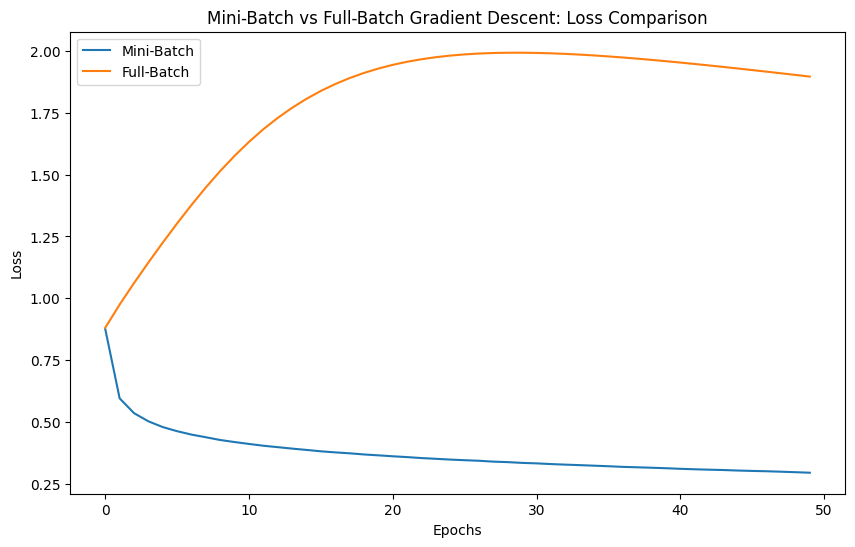

Results:
Mini-Batch Gradient Descent: Final Loss: 0.2947, Final Accuracy: 0.9019, Training Time: 94.03 seconds
Full-Batch Gradient Descent: Final Loss: 1.8967, Final Accuracy: 0.2779, Training Time: 38.24 seconds


In [66]:
compare_mini_batch_and_full_batch(X_train=x_train, y_train=y_train, hidden_size=64, epochs=50, batch_size=32)